In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
# Load dataset
df = pd.read_csv('D:/My Data ALL/Downloads/archive(1).zip')


In [3]:
# Tampilkan beberapa baris pertama
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
# Cek missing values
print(df.isnull().sum())


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [8]:
# Definisikan fitur dan target
X = df.drop("Research", axis=1)
y = df["Research"]


In [9]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)


In [11]:
# Melatih model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)


In [13]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7125
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.75      0.77      0.76        47

    accuracy                           0.71        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.71      0.71      0.71        80

Confusion Matrix:
[[21 12]
 [11 36]]


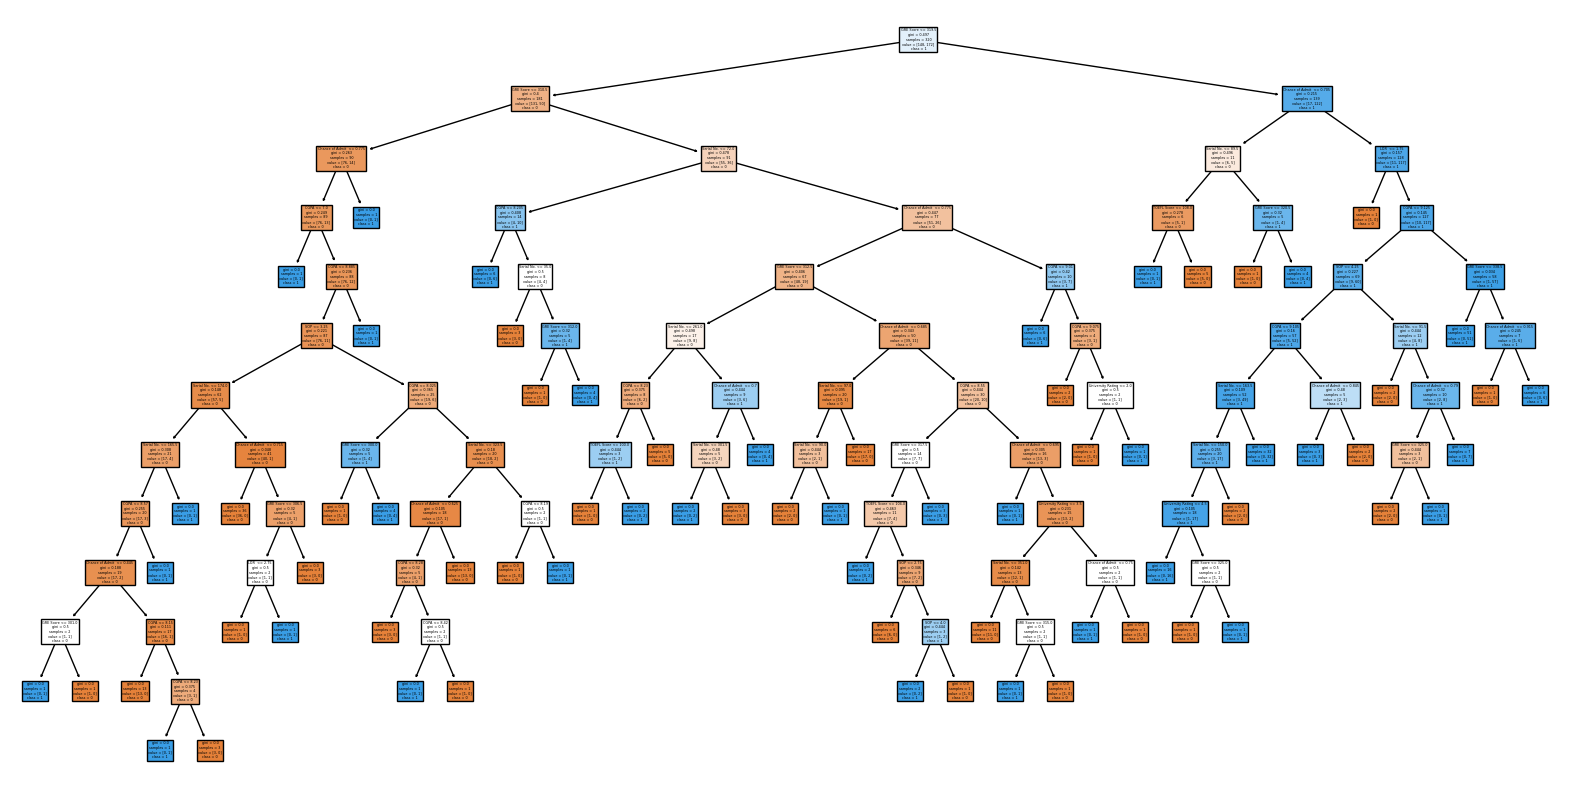

In [14]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()